In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
results_dir = Path(r'D:\document\code\paper\World-of-Six\results\results_qwen_max')
results_dir

WindowsPath('D:/document/code/paper/World-of-Six/results/results_qwen_max')

In [3]:
base_path_to_save = Path(r"D:\document\code\paper\World-of-Six\assets\figures")
base_path_to_save

WindowsPath('D:/document/code/paper/World-of-Six/assets/figures')

In [13]:
def process_df(df, beta_name):
    theoretical_solution_map = None
    if beta_name == 'beta_025':
        theoretical_solution_map = {
            2.24: 6, 2.99: 5, 3.74: 4, 4.49: 3, 5.24: 2, 5.99: 1,
        }
    elif beta_name == 'beta_075':
        theoretical_solution_map = {
            4.74: 6, 4.99: 5, 5.24: 4, 5.49: 3, 5.74: 2, 5.99: 1,
        }
    df['theoretical_solution'] = df['price'].map(theoretical_solution_map)
    df['group_mean'] = df.groupby('price')['expectation'].transform('mean')
    df['t_price'] = df['price'].astype(str)
    return df

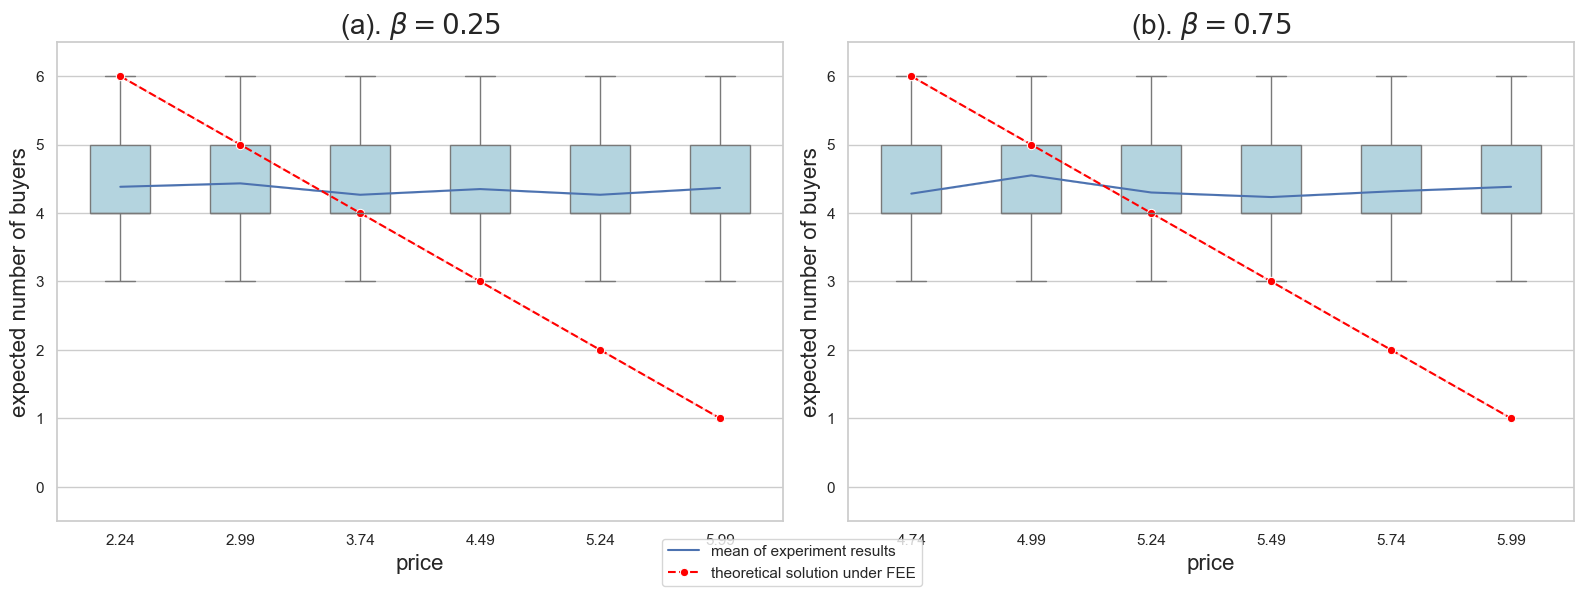

In [114]:
def get_no_history_figure():
    df_025 = pd.concat([pd.read_excel(results_dir/'results_excel'/'beta_025'/'no_history_no_guidance'/f"price_{i}.xlsx")
                         for i in range(6)])
    df_075 = pd.concat([pd.read_excel(results_dir/'results_excel'/'beta_075'/'no_history_no_guidance'/f"price_{i}.xlsx")
                         for i in range(6)])
    df_025 = process_df(df_025, 'beta_025')
    df_075 = process_df(df_075, 'beta_075')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    # plt.clf()
    sns.set(style="whitegrid")
    # plt.rcParams.update({'font.size': 20})
    sns.boxplot(
        ax=ax1,
        data=df_025, x='t_price', y='expectation',
        order=['2.24', '2.99', '3.74', '4.49', '5.24', '5.99'],
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=ax1,
        data=df_025, x='t_price', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=ax1,
        data=df_025, x='t_price', y='theoretical_solution',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    sns.boxplot(
        ax=ax2,
        data=df_075, x='t_price', y='expectation',
        order=['4.74', '4.99', '5.24', '5.49', '5.74', '5.99'],
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=ax2,
        data=df_075, x='t_price', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=ax2,
        data=df_075, x='t_price', y='theoretical_solution',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    ax1.set_title(r'(a). $\beta=0.25$', fontsize=20)
    ax2.set_title(r'(b). $\beta=0.75$', fontsize=20)
    ax1.set_xlabel("price", fontsize=16)
    ax1.set_ylabel("expected number of buyers", fontsize=16)
    ax1.set_ylim(-0.5, 6.5)
    ax2.set_xlabel("price", fontsize=16)
    ax2.set_ylabel("expected number of buyers", fontsize=16)
    ax2.set_ylim(-0.5, 6.5)
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels,)# loc='lower center',)# bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    # plt.savefig(base_path_to_save / 'benchmark.png', dpi=300)

get_no_history_figure()

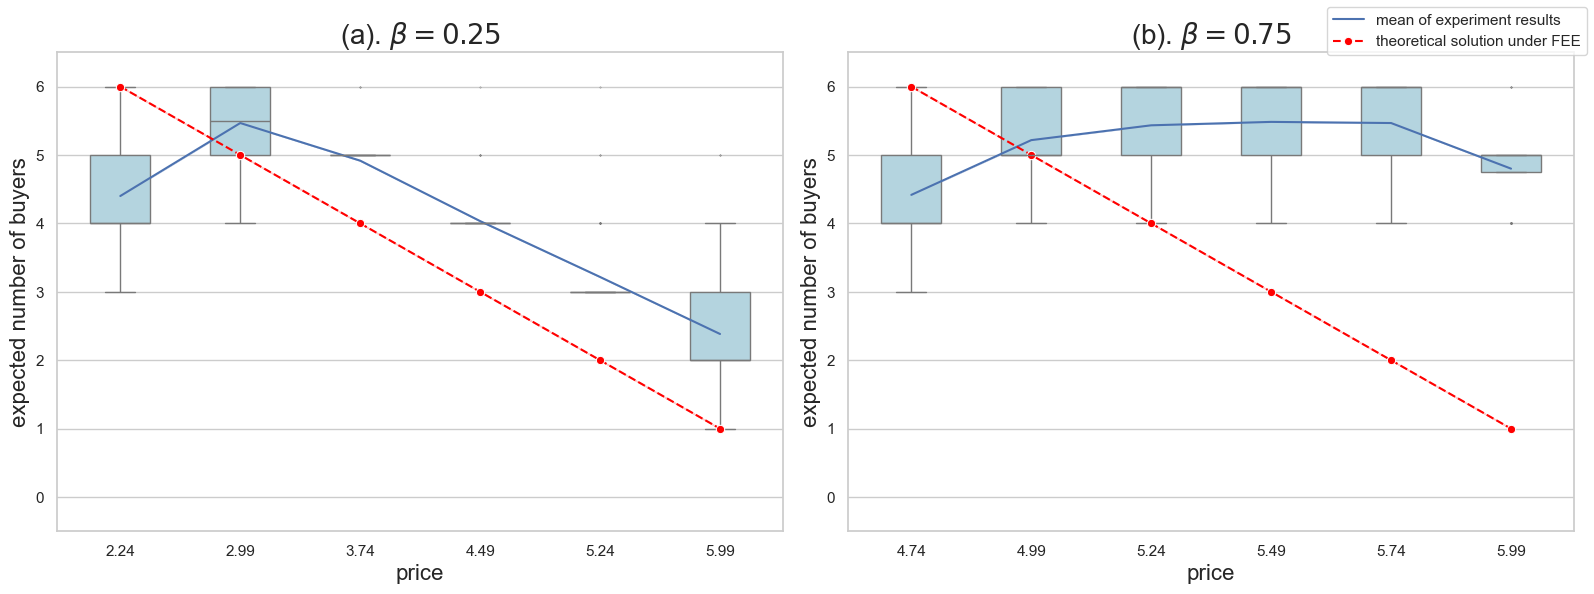

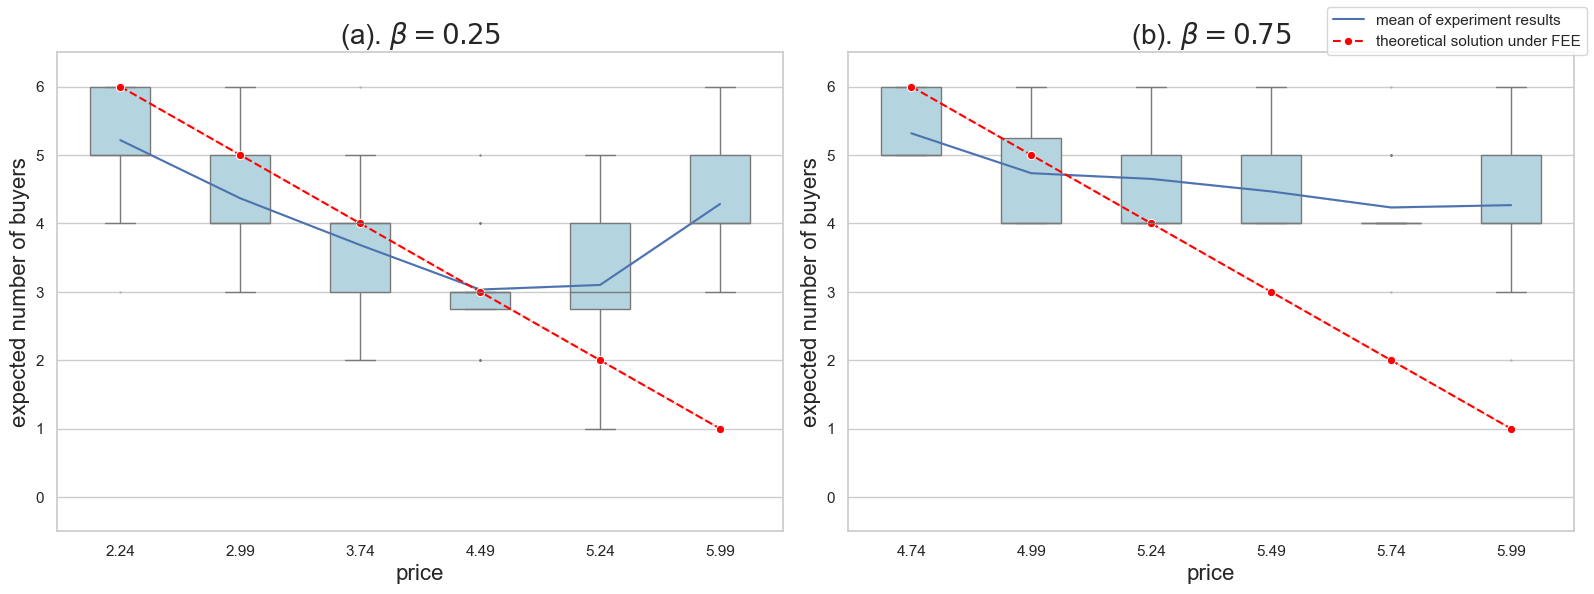

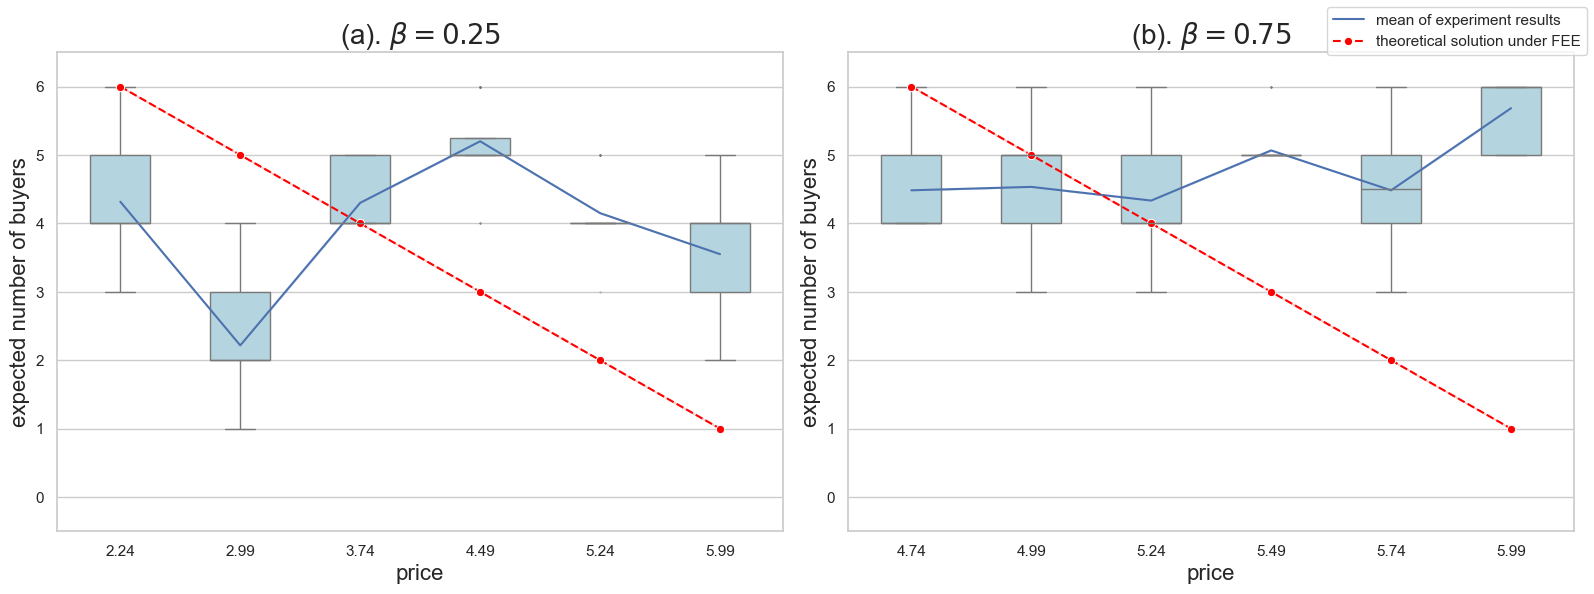

In [110]:
def get_price_list_figures(excel_name = 'sequence_price'):
    df_025 = pd.read_excel(results_dir/'results_excel'/'beta_025'/'no_guidance'/f"{excel_name}.xlsx")
    df_075 = pd.read_excel(results_dir/'results_excel'/'beta_075'/'no_guidance'/f"{excel_name}.xlsx")
    df_025 = process_df(df_025, 'beta_025')
    df_075 = process_df(df_075, 'beta_075')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    # plt.clf()
    sns.set(style="whitegrid")
    # plt.rcParams.update({'font.size': 20})
    sns.boxplot(
        ax=ax1,
        data=df_025, x='t_price', y='expectation',
        order=['2.24', '2.99', '3.74', '4.49', '5.24', '5.99'],
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=ax1,
        data=df_025, x='t_price', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=ax1,
        data=df_025, x='t_price', y='theoretical_solution',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    sns.boxplot(
        ax=ax2,
        data=df_075, x='t_price', y='expectation',
        order=['4.74', '4.99', '5.24', '5.49', '5.74', '5.99'],
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=ax2,
        data=df_075, x='t_price', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=ax2,
        data=df_075, x='t_price', y='theoretical_solution',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    ax1.set_title(r'(a). $\beta=0.25$', fontsize=20)
    ax2.set_title(r'(b). $\beta=0.75$', fontsize=20)
    ax1.set_xlabel("price", fontsize=16)
    ax1.set_ylabel("expected number of buyers", fontsize=16)
    ax1.set_ylim(-0.5, 6.5)
    ax2.set_xlabel("price", fontsize=16)
    ax2.set_ylabel("expected number of buyers", fontsize=16)
    ax2.set_ylim(-0.5, 6.5)
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels,)
    plt.tight_layout()
    plt.savefig(base_path_to_save / f'{excel_name}.png', dpi=300)

get_price_list_figures('sequence_price')
get_price_list_figures('reverse_price')
get_price_list_figures('random_price')

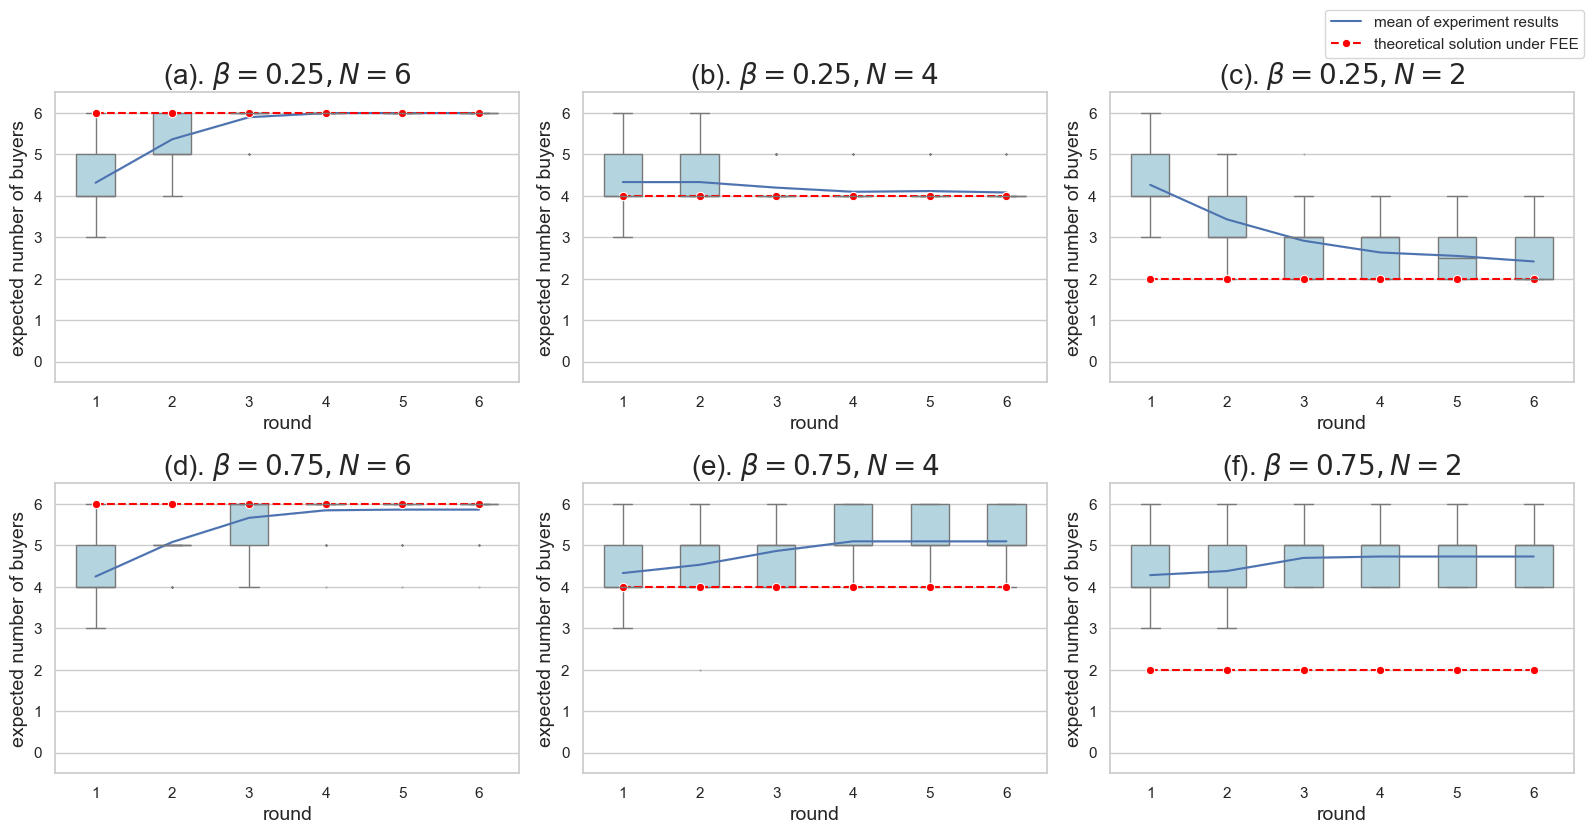

In [5]:
def get_same_price_figures():
    def p_df(df):
        df['group_mean'] = df.groupby('game_round')['expectation'].transform('mean')
        df['t_game_round'] = df['game_round'].astype(str)
        return df
    df_025_0, df_025_2, df_025_4 = [
        p_df(pd.read_excel(results_dir/'results_excel'/'beta_025'/'no_guidance'/f"same_price_{i}.xlsx"))
        for i in range(0, 6, 2)
    ]
    df_075_0, df_075_2, df_075_4 = [
        p_df(pd.read_excel(results_dir/'results_excel'/'beta_075'/'no_guidance'/f"same_price_{i}.xlsx"))
        for i in range(0, 6, 2)
    ]
    fig, axs = plt.subplots(2, 3, figsize=(16, 8),)# constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.boxplot(
        ax=axs[0, 0],
        data=df_025_0, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[0, 0],
        data=df_025_0, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[0, 0],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [6 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    sns.boxplot(
        ax=axs[0, 1],
        data=df_025_2, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[0, 1],
        data=df_025_2, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[0, 1],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [4 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    sns.boxplot(
        ax=axs[0, 2],
        data=df_025_4, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[0, 2],
        data=df_025_4, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[0, 2],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [2 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    
    sns.boxplot(
        ax=axs[1, 0],
        data=df_075_0, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[1, 0],
        data=df_075_0, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[1, 0],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [6 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    sns.boxplot(
        ax=axs[1, 1],
        data=df_075_2, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[1, 1],
        data=df_075_2, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[1, 1],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [4 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    sns.boxplot(
        ax=axs[1, 2],
        data=df_075_4, x='t_game_round', y='expectation',
        color='lightblue', width=0.5,
        fliersize=0.3,
    )
    sns.lineplot(
        ax=axs[1, 2],
        data=df_075_4, x='t_game_round', y='group_mean',
        label='mean of experiment results', legend=False,
    )
    sns.lineplot(
        ax=axs[1, 2],
        data={
            't_game_round': ['1', '2', '3', '4', '5', '6', ],
            'expectation': [2 for _ in range(6)],
        }, x='t_game_round', y='expectation',
        marker='o', linestyle='--', color='red',
        label='theoretical solution under FEE', legend=False,
    )
    
    axs[0, 0].set_title(r'(a). $\beta=0.25, N=6$', fontsize=20)
    axs[0, 1].set_title(r'(b). $\beta=0.25, N=4$', fontsize=20)
    axs[0, 2].set_title(r'(c). $\beta=0.25, N=2$', fontsize=20)
    axs[1, 0].set_title(r'(d). $\beta=0.75, N=6$', fontsize=20)
    axs[1, 1].set_title(r'(e). $\beta=0.75, N=4$', fontsize=20)
    axs[1, 2].set_title(r'(f). $\beta=0.75, N=2$', fontsize=20)
    [
        axs[i, j].set_xlabel("round", fontsize=14)
        for i in range(0, 2) for j in range(0, 3)
    ]
    [
        axs[i, j].set_ylabel("expected number of buyers", fontsize=14)
        for i in range(0, 2) for j in range(0, 3)
    ]
    [
        axs[i, j].set_ylim(-0.5, 6.5)
        for i in range(0, 2) for j in range(0, 3)
    ]
    # plt.subplots_adjust(left=0.5)
    handles, labels = axs[0,0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1, 1.05))# loc='center',)
    plt.tight_layout()
    plt.savefig(base_path_to_save / f'same_price.png', dpi=300, bbox_inches="tight")
    
get_same_price_figures()